In [2]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import linecache

In [5]:
path_data = '/Users/loicregne/code/rs-uk/pictionary-ai/raw_data'
file_name = 'full_simplified_face.ndjson'

In [10]:
# Exploring the simplified data, lloking at the face drawings
file_path_simplified_face = '/'.join((path_data, file_name))

drawing_number = 1
json_drawing = linecache.getline(file_path_simplified_face, drawing_number, module_globals=None)

# with open(file_path_simplified_face, 'r') as f:
#     for i, line in enumerate(f):
#         # We only look at the first json drawing among the list
#         if i > 0:
#             break
#         # We load the JSON in the first line of the ndjson file
#         json_drawing = json.loads(line)
# # We build a DF from that JSON to visualize it easily
df = pd.DataFrame(json.loads(json_drawing))
df

,word,countrycode,timestamp,recognized,key_id,drawing
0,face,CH,2017-03-19 15:52:39.229 UTC,True,5152530285723648,"[[59, 44, 28, 17, 8, 0, 0, 13, 32, 49, 85, 110..."
1,face,CH,2017-03-19 15:52:39.229 UTC,True,5152530285723648,"[[76, 76, 71, 59, 56, 56, 61, 72, 83, 89, 86, ..."
2,face,CH,2017-03-19 15:52:39.229 UTC,True,5152530285723648,"[[176, 166, 146, 133, 130, 157, 192, 198, 196,..."
3,face,CH,2017-03-19 15:52:39.229 UTC,True,5152530285723648,"[[57, 68, 80, 110, 153, 202, 216, 228, 231], [..."


In [11]:
import linecache

linecache.getline(file_path_simplified_face, 345, module_globals=None)

'{"word":"face","countrycode":"BR","timestamp":"2017-01-25 21:14:51.95047 UTC","recognized":true,"key_id":"5364990963875840","drawing":[[[53,40,22,5,0,0,5,24,64,95,110,139,155,169,182,187,186,169,149,134,119,98,64,46,43],[20,24,42,80,83,105,126,168,224,247,254,255,251,235,206,172,140,86,58,45,33,25,3,0,9]],[[49,46,48,59,64,54],[97,90,79,79,90,98]],[[113,110,103,95,119,131,131,128,106],[100,94,92,78,79,87,105,111,107]],[[62,71,94,115,143,155,156],[164,174,183,187,187,164,149]],[[146,167],[136,151]]]}\n'

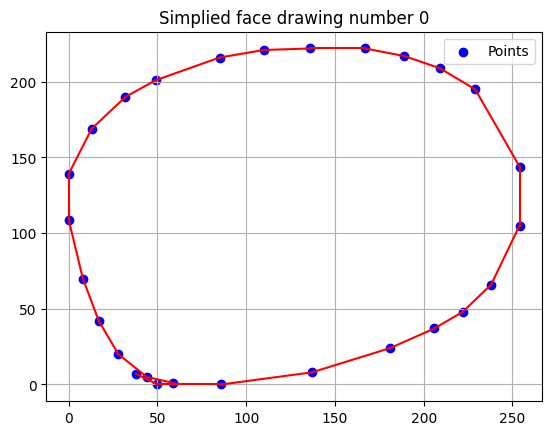

In [12]:
# Extract a stroke from json drawing from a simplified collection
drawing_number = 0
json_drawing = df.loc[drawing_number]  # Change the index if needed

# Extract x, y, and time lists
x_values = json_drawing['drawing'][0]
y_values = json_drawing['drawing'][1]

# Create a scatter plot of the points
plt.scatter(x_values, y_values, color='blue', marker='o', label='Points')

# Connect the points with lines
for i in range(len(x_values) - 1):
    plt.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color='red')

# Customize the plot (add labels, title, etc.)
plt.title(f"Simplied face drawing number {drawing_number}")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

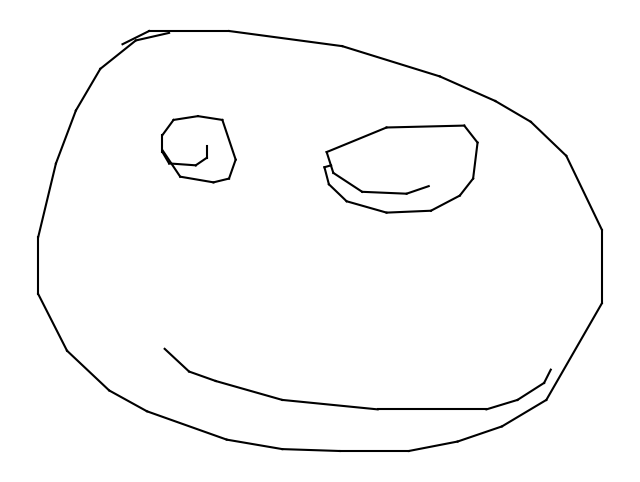

In [32]:
# Create a new figure for the combined drawing
plt_drawing_simplified = plt.figure(figsize=(8, 6))
plt.gca().invert_yaxis()
plt.axis('off')

# Iterate through each row and plot the points
num_rows = df.shape[0]
for i in range(num_rows):
    x_values = df.loc[i, 'drawing'][0]
    y_values = df.loc[i, 'drawing'][1]
    # plt.plot(x_values, y_values, label=f"Row {i}")

    # Create a scatter plot of the points
    # plt.scatter(x_values, y_values, color='blue', marker='o', label='Points')

    # Connect the points with lines
    for i in range(len(x_values) - 1):
        plt.plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color='black')

# Customize the plot (add labels, title, etc.)
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.title('Drawing from First SIMPLIFIED drawing')
# plt.grid(True)
# plt.legend()

# Show the plot
# plt.show()